In [92]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import seaborn as sns

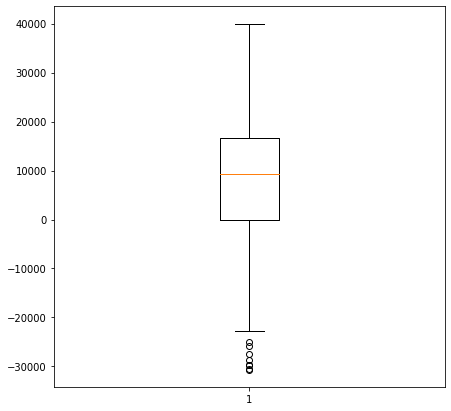

In [90]:
X_train = pd.read_csv('train.csv')
X_train = X_train.fillna(method='bfill')
X_train = X_train.dropna()
X_train.isnull().sum()

categorical = list(X_train.select_dtypes(include='object'))
numerical = list(X_train.select_dtypes(include='number'))
#X_train._get_numeric_data().columns
numerical
X_train.select_dtypes(include='object')

X_train = X_train.drop('Id',axis=1)
X_train['Organization Group'] = X_train['Organization Group'].str.split(',').str[0]
X_train['Union'] = X_train['Union'].str.split(',').str[0]
X_train['Job Family'] = X_train['Job Family'].str.split(',').str[0]
X_train['Job'] = X_train['Job'].str.split(',').str[0]
X_train['Year Type'] = X_train['Year Type'].str.split(',').str[0]


label = LabelEncoder()
X_train['Department'] = label.fit_transform(X_train['Department'])
X_train['Union'] = label.fit_transform(X_train['Union'])
X_train['Organization Group'] = label.fit_transform(X_train['Organization Group'])
X_train['Job Family'] = label.fit_transform(X_train['Job Family'])
X_train['Job'] = label.fit_transform(X_train['Job'])
X_train['Year Type'] = label.fit_transform(X_train['Year Type'])
X_train['Year'] = label.fit_transform(X_train['Year'])


X_train= X_train.drop('Employee Identifier', axis=1)

X_train['Retirement'] = X_train['Retirement'].str.replace('$','').astype(float)
X_train['Health and Dental'] = X_train['Health and Dental'].str.replace('$','').astype(float)
X_train['Other Benefits'] = X_train['Other Benefits'].str.replace('$','').astype(float)

X_train = X_train[X_train['Health and Dental']<=30000]
X_train = X_train[X_train['Other Benefits']<=20000]
X_train = X_train[X_train['Retirement']<=40000]

fig = plt.figure(figsize=(7, 7))
plt.boxplot(X_train['Retirement'])

X = X_train.drop('Total Compensation', axis=1)
y = X_train['Total Compensation']



In [120]:
ridge_lambdas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]
lasso_lambdas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]
X_train,X_val,y_train,y_val=train_test_split(X,y ,test_size=0.3,random_state=8)

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)

L1=Lasso()
L2= Ridge()

ridge_grid = GridSearchCV(L2, param_grid=dict(alpha=ridge_lambdas))
ridge_grid.fit(x_poly, y_train)

xx_poly = polynomial_features.fit_transform(X_val)
pred = ridge_grid.predict(xx_poly)

r2_ridge = r2_score(y_val, pred)
r2_ridge

x_poly.shape

C:\Users\Abhineet\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Abhineet\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.28625e-25): result may not be accurate.
  overwrite_a=True).T
C:\Users\Abhineet\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.29617e-25): result may not be accurate.
  overwrite_a=True).T
C:\Users\Abhineet\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.29369e-25): result may not be accurate.
  overwrite_a=True).T
C:\Users\Abhineet\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.85876e-25): result may not be accurate.
  over

(388514, 66)

#sns.relplot(x='Union',y='Retirement', data=X_train)
#sns.catplot(x='Organization Group', y='Health and Dental', data=X_train, kind='box', height=6)

#sns.regplot(x='Organization Group', y='Health and Dental', data=X_train, x_jitter=0.05)

In [133]:
test = pd.read_csv('test.csv')
abc= test.drop('Employee Identifier', axis=1)


xyz = abc.fillna(method='bfill')
xyz = xyz.dropna()
yyz = xyz.drop('Id',axis=1)
yyz.isnull().sum()



yyz['Department'] = label.fit_transform(yyz['Department'])
yyz['Union'] = label.fit_transform(yyz['Union'])
yyz['Organization Group'] = label.fit_transform(yyz['Organization Group'])
yyz['Job Family'] = label.fit_transform(yyz['Job Family'])
yyz['Job'] = label.fit_transform(yyz['Job'])
yyz['Year Type'] = label.fit_transform(yyz['Year Type'])
yyz['Year'] = label.fit_transform(yyz['Year'])



yyz['Retirement'] = yyz['Retirement'].str.replace('$','').astype(float)
yyz['Health and Dental'] = yyz['Health and Dental'].str.replace('$','').astype(float)
yyz['Other Benefits'] = yyz['Other Benefits'].str.replace('$','').astype(float)

xyz_poly = polynomial_features.fit_transform(yyz)

prediction = ridge_grid.predict(xyz_poly)
prediction.shape

xo = pd.DataFrame({'Id': xyz.Id, 'Total Compensation': prediction})
xo.to_csv('comp.csv', index=False)
xo

,Id,Total Compensation
0,0,10296.328368
1,1,108048.655506
2,2,88459.242608
3,3,20772.393609
4,4,39965.118326
...,...,...
177214,177214,225756.073063
177215,177215,105828.937186
177216,177216,43547.769706
177217,177217,43839.909598
